In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd

In [8]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [10]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [25]:
# engine.execute('SELECT * FROM station').fetchall()
# engine.execute('SELECT * FROM measurement').fetchall()

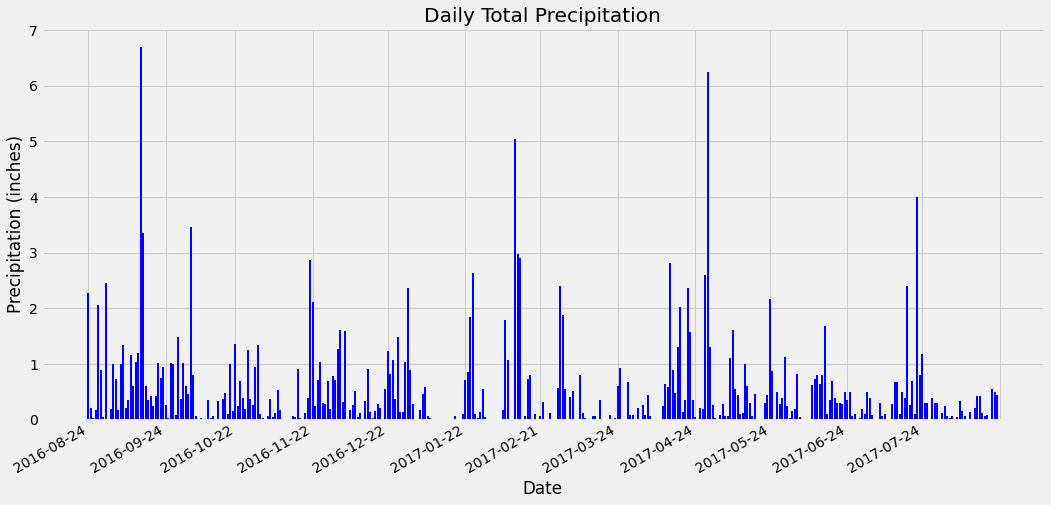

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
first_date = session.query(Measurement.date).order_by(Measurement.date).first()
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(year_ago)
## Result = 2016-08-23

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measurement.date, func.max(Measurement.prcp).label("precipitation")).group_by(Measurement.date).\
    filter(Measurement.date > year_ago)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(date_prcp, columns=['date', 'precipitation'])
dates = list(df['date'])
precipitation = list(df['precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(df.index.values,
       df['precipitation'],
       color='blue')
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
fig.autofmt_xdate()
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [372]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station.id).count()
print(stations_count)

9


In [489]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()
station_counts_df = pd.DataFrame(station_counts, columns=['station', 'count'])
station_counts_df.set_index('station', inplace=True)
station_counts_df.sort_values(by='count', ascending=False)

,count
station,
USC00518838,511
USC00517948,1372
USC00511918,1979
USC00514830,2202
USC00516128,2612
USC00519523,2669
USC00513117,2709
USC00519397,2724
USC00519281,2772


In [450]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(lowest_temp)
print(highest_temp)
print(avg_temp)

[('USC00519281', 54.0)]
[('USC00519281', 85.0)]
[('USC00519281', 71.66378066378067)]


[Text(0.5, 0, 'Temperature'), Text(0, 0.5, 'Frequency')]

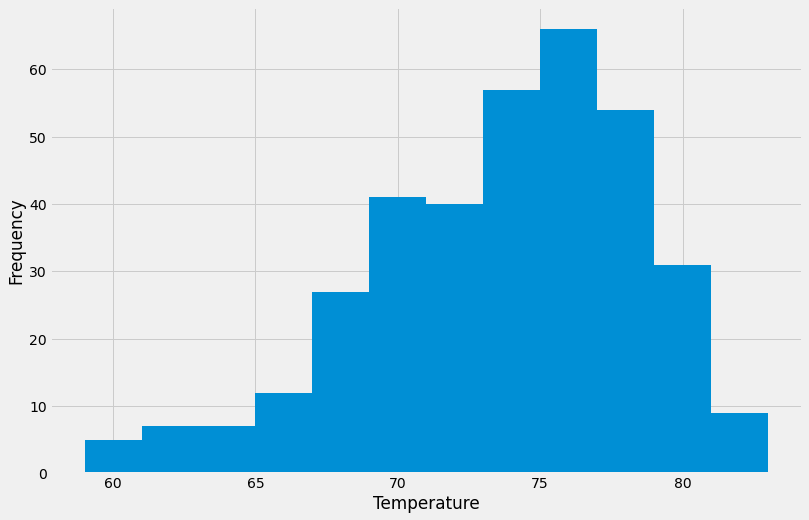

In [491]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_ago = dt.date(2017, 8, 18) - dt.timedelta(days=365)
most_active = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > year_ago).all()
most_active_df = pd.DataFrame(most_active, columns=['date', 'temp'])
most_active_df.set_index('date', inplace=True)
temps = list(most_active_df['temp'])
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(temps,bins=12)
ax.set(xlabel="Temperature",
       ylabel="Frequency")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
